In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from radar import *

plt.style.use('ggplot')
%matplotlib inline

In [2]:
TOP50 = pd.read_csv('../../Paper/TOP50_Events/TOP50_events_Charlotte.csv', parse_dates=[0,1])

### 1D

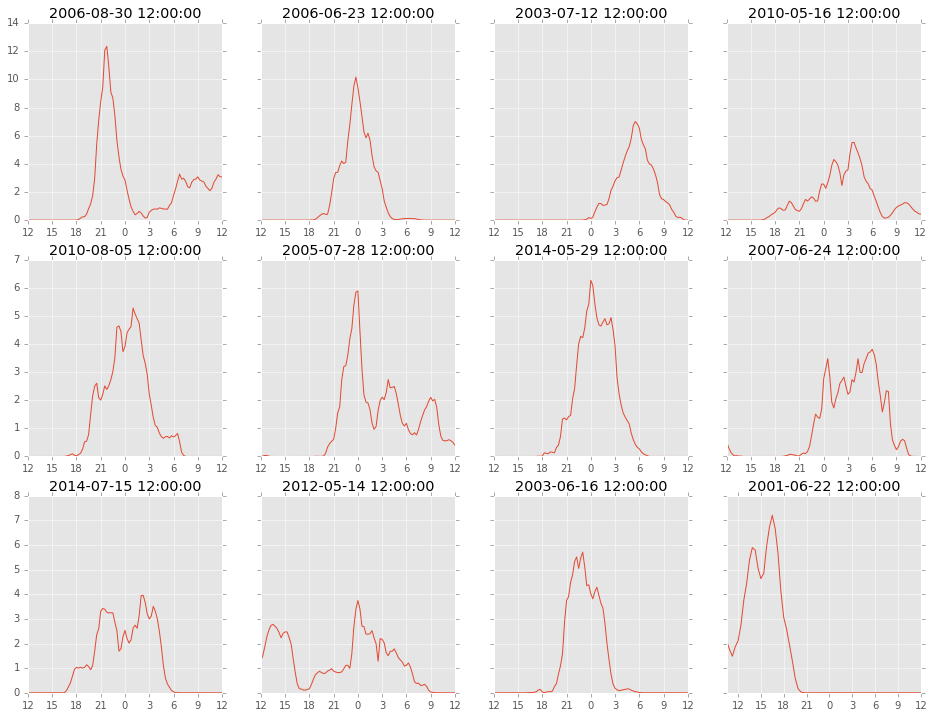

In [4]:
fig, axes = plt.subplots(figsize=(16,12), ncols=4, nrows=3, sharey='row')
for n, ax in zip(range(0,12), axes.flatten()):
    c = Radar('charlotte', TOP50.t_begin[n], how='hdf5', store='TOP50.h5', fname='storm_{yyyy}_{mm:02d}_{dd:02d}', make_rate=4)
    ax.plot(c.time, np.nanmean(c.box, axis=(1,2)))
    ax.set_title(c.t)
    ax.set_xticklabels(['12', '15', '18', '21','0','3','6','9','12'])


### 2D

In [10]:
import cartopy.io.shapereader as shpreader

small_extent = [-81.035000-.01, -80.552222+.01, 35.019722-.01, 35.507778+.01]

fname = '../../data/CHARLOTTE/Maps/new_basin.shp'
basins = list(shpreader.Reader(fname).geometries())

fname = '../../data/CHARLOTTE/Maps/county.shp'
county = list(shpreader.Reader(fname).geometries())

cmap = plt.cm.get_cmap('jet', 10)
cmap.set_under(color='None')

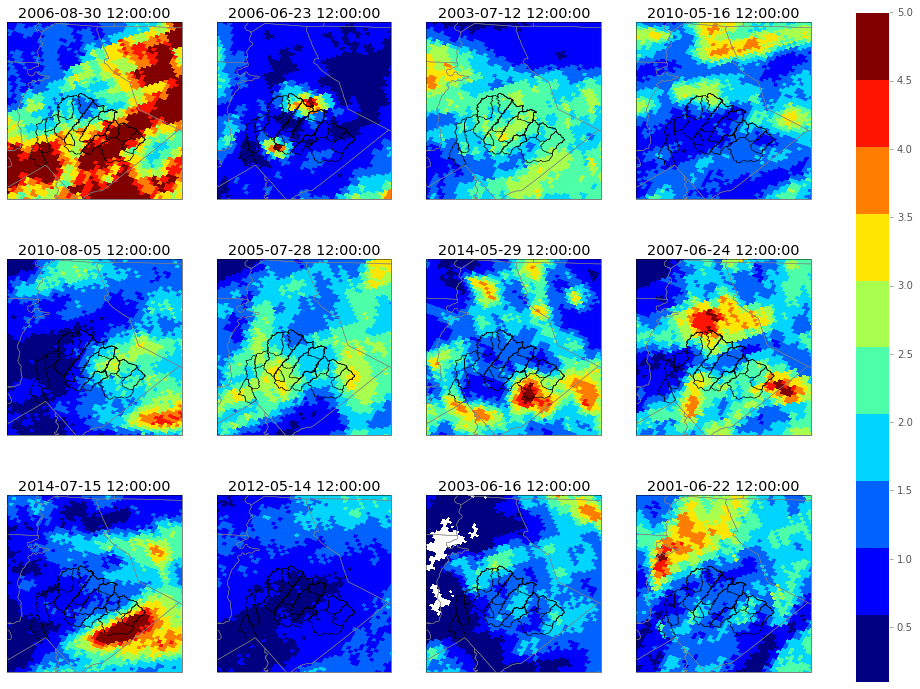

In [34]:
fig = plt.figure(figsize=(16,12))
axes = []
for n in range(0,12):
    c = Radar('charlotte', TOP50.t_begin[n], how='hdf5', store='TOP50.h5', fname='storm_{yyyy}_{mm:02d}_{dd:02d}', make_rate=4)
    ax = plt.subplot(3, 4, n+1, projection=ccrs.PlateCarree())
    axes.append(ax)
    plt.title(c.t)
    ax.add_geometries(basins, ccrs.PlateCarree(), edgecolor='black', facecolor='None')
    ax.add_geometries(county, ccrs.PlateCarree(), edgecolor='gray', facecolor='None')
    ax.set_extent(small_extent, ccrs.PlateCarree())
    scat = ax.pcolor(c.lon, c.lat, np.nanmean(c.box, axis=0), cmap=cmap, vmin=0.1, vmax=5)
fig.colorbar(scat, ax=axes, fraction=0.05) #fraction=0.07)
#plt.savefig('/home/jsignell/Paper/Notebooks/output/Top 24-48 Events in 2D.png')

### 3D

In [ ]:
plt.figure(figsize=(16, .5))
cbar = plt.colorbar(scat, orientation='horizontal', cax=plt.subplot(1,1,1))
cbar.ax.set_xticklabels([' '])
cbar.set_label(''.join(['<-- less rain', ' '*100, 'more rain -->']), fontsize=20)

In [ ]:
kwargs = dict(cmap = plt.cm.get_cmap('RdBu'), nrows=6, ncols=4)
fig = plt.figure(figsize=(16,24))
for n in range(0,24):
    c = Radar('charlotte', TOP50.t_begin[n], how='hdf5', store='TOP50.h5', fname='storm_{yyyy}_{mm:02d}_{dd:02d}')
    scat, ax = c.centralized_difference(n=n+1, **kwargs)
    ax.set_title(c.t)
plt.savefig('/home/jsignell/Paper/Notebooks/output/Top 24 Events in 3D.png')

In [ ]:
kwargs = dict(cmap = plt.cm.get_cmap('RdBu'), nrows=6, ncols=4)
fig = plt.figure(figsize=(16,24))
for n in range(24,48):
    c = Radar('charlotte', TOP50.t_begin[n], how='hdf5', store='TOP50.h5', fname='storm_{yyyy}_{mm:02d}_{dd:02d}')
    scat, ax = c.centralized_difference(n=n-23, **kwargs)
    ax.set_title(c.t)
plt.savefig('/home/jsignell/Paper/Notebooks/output/Top 24-48 Events in 3D.png')